In [2]:
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from sneks_ai import * # use the classes from sneks-ai.py
import numpy as np

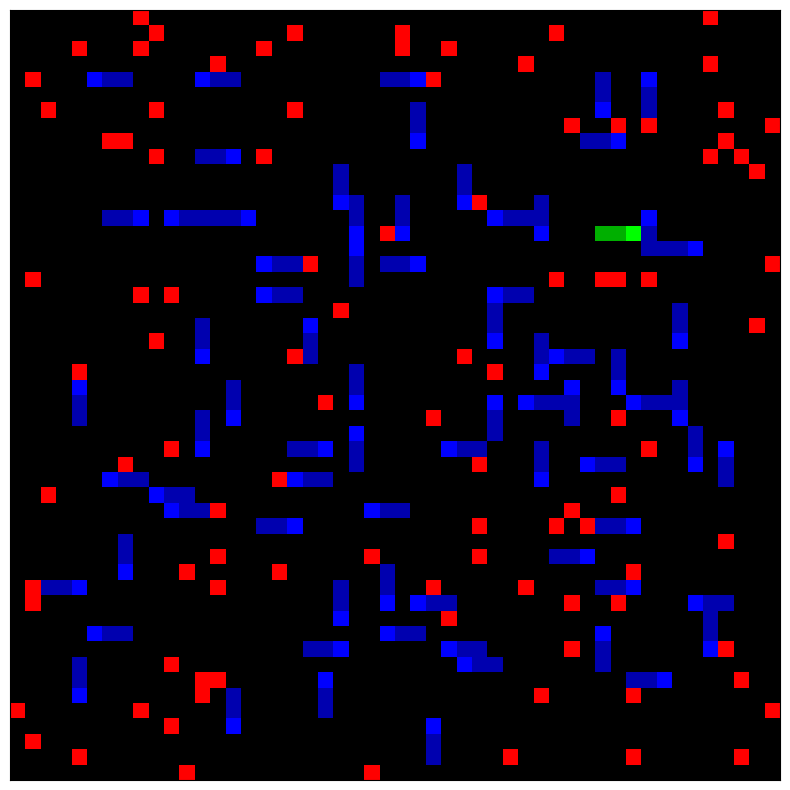

In [5]:
gameSize = 50
numSnakes = 75
numApples = 100
myFigsize = 10
game = SnakeGame(
    canvas_size = gameSize, 
    nApples = numApples, 
    nSnakes = numSnakes,
    annotate = False,
    keepGameLog = True
    )
agnosticstate_flat = game.get_agnosticState().flatten()

snakeIDs = [snake for snake in game.snakes]
# give each snake a new fresh brain
for snakeID in snakeIDs:
    game.snakes[snakeID].brain = NeuralNetwork(input_size = len(agnosticstate_flat),
                    output_size = len(game.choices),
                    hidden_layers = [1200, 500, 300, 100, 25],
                    activation_functions = ['relu', 'relu', 'relu', 'relu', 'relu', 'softmax']
                    )
    # print([w.shape for w in game.snakes[snakeID].brain.Weights])
plt.figure(figsize=(myFigsize,myFigsize))
plt.imshow(game.get_state(snakeID=snakeIDs[0]))
plt.xticks([])
plt.yticks([])
plt.show()

# Outside of the game you request actions of each snake, and then update the game with the action_vector, where the action vector length is the number of snakes

In [6]:
# play nGames and save the longest game for playback
nGames = 2000
longestgame = 0
highestscore = 0
scoreboard = np.zeros((nGames, numSnakes))
letmeknow_percent = 0.05

for i in range(nGames):
    # every 100 games, print the progress
    if nGames>100:
        if (i+1) % int(nGames*letmeknow_percent) == 0:
            print(f"Game {i+1} of {nGames} [{(i+1)/nGames*100:.2f}%]; Current longest = {longestgame:.0f}; Current highest = {highestscore:.2f}")
            
    game.reset()
    while not game.done:
        action_vector = [None]*numSnakes
        for snake in game.snakes:
            if game.snakes[snake].alive:
                action_vector[snake] = game.snakes[snake].take_action(game.get_state(snakeID=snake), game.choices)
        game.updateGame(action_vector)

    # save the score of each snake
    for snake in game.snakes:
        scoreboard[i, snake] = game.snakes[snake].score
    
    # Save the longest game
    if len(game.gameLog) > longestgame:
        longestgame = len(game.gameLog)
        longestGame = game.gameLog
    
    # Save the highest scoring game
    if np.sum(scoreboard[i,:]) > highestscore:
        highestscore = np.sum(scoreboard[i,:])
        bestGame = game.gameLog

Game 100 of 2000 [5.00%]; Current longest = 32; Current highest = 3933.83
Game 200 of 2000 [10.00%]; Current longest = 32; Current highest = 4525.61
Game 300 of 2000 [15.00%]; Current longest = 32; Current highest = 4525.61
Game 400 of 2000 [20.00%]; Current longest = 32; Current highest = 4863.89
Game 500 of 2000 [25.00%]; Current longest = 32; Current highest = 4863.89
Game 600 of 2000 [30.00%]; Current longest = 32; Current highest = 4863.89
Game 700 of 2000 [35.00%]; Current longest = 32; Current highest = 4863.89
Game 800 of 2000 [40.00%]; Current longest = 32; Current highest = 4863.89
Game 900 of 2000 [45.00%]; Current longest = 32; Current highest = 4863.89
Game 1000 of 2000 [50.00%]; Current longest = 32; Current highest = 4863.89
Game 1100 of 2000 [55.00%]; Current longest = 32; Current highest = 5020.63
Game 1200 of 2000 [60.00%]; Current longest = 32; Current highest = 5020.63
Game 1300 of 2000 [65.00%]; Current longest = 32; Current highest = 5324.09
Game 1400 of 2000 [70.

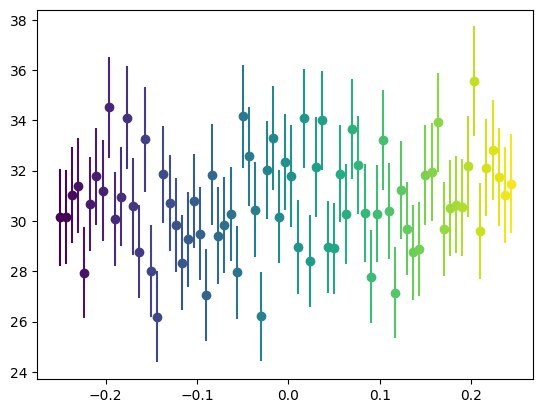

In [7]:
# make a standard error bar plot of the scores for each snake
mean_scores = np.mean(scoreboard, axis=0)
sem_scores = np.std(scoreboard, axis=0)/np.sqrt(nGames)

# plt.figure(figsize=(10,5))
# have color gradient
evolution = [0]
for phases in range(len(evolution)):
    for snake in range(numSnakes):
        plt.errorbar(evolution[phases] + (snake/numSnakes)*0.5 -0.25, mean_scores[snake], yerr=sem_scores[snake], fmt='o', color=plt.cm.viridis(snake/numSnakes))

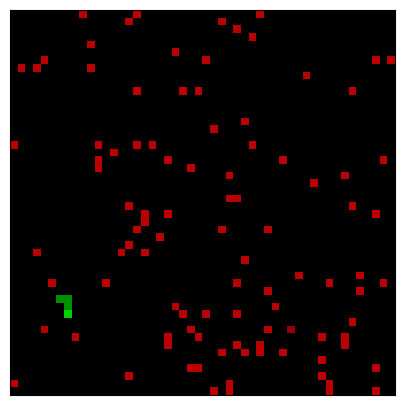

In [9]:
myFigsize = 5
fig, ax = plt.subplots(figsize=(myFigsize, myFigsize))  # Initialize the figure and axes objects

playGame = longestGame
# playback the best game
# playGame = bestGame
# playback the longest game
for state in playGame:
    ax.clear()  # Clear the previous state
    ax.imshow(playGame[state])  # Display the current state
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    display(fig)
    clear_output(wait=True)
    time.sleep(0.02)